In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing ##

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing ###

In [7]:
import re
import string

#### Convert uppercase to lowercase ####

In [8]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(y.lower() for y in x.split()))

tweetes_split = tweets.apply(lambda x: x.split())
tweets_lower = tweets_split.apply(lambda x: [y.lower() for y in x])
tweets_cleaned = tweets_lower.apply(lambda x: " ".join(x))
data['tweet'] = tweets_cleaned

In [9]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

#### Remove links ####

In [10]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(re.sub(r'https?:\/\/.*[\r\n]*', '',y, flags=re.MULTILINE) for y in x.split()))

In [11]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

#### Remove punctuations ####

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [14]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

#### Remove numbers ####

In [15]:
data["tweet"] = data["tweet"].str.replace('\d+', '', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\BLACKBOX\AppData\Local\Temp\ipykernel_11680\910477839.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["tweet"] = data["tweet"].str.replace('\d+', '', regex=True)


In [16]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

#### Remove stopwords ####

In [17]:
!pip install nltk


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\BLACKBOX\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [18]:
import nltk

In [19]:
nltk.download('stopwords', download_dir = '../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [20]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [21]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [22]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(y for y in x.split() if y not in sw))

In [23]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

#### Stemming ####

In [24]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [25]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(y) for y in x.split()))

In [26]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [27]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vocabulary ###

In [28]:
from collections import Counter
vocab = Counter()

In [29]:
vocab

Counter()

In [30]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [31]:
data['tweet']

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [32]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [33]:
len(vocab)

15904

In [34]:
data.shape

(7920, 3)

In [35]:
tokens = [key for key in vocab if vocab[key] > 10]

In [36]:
len(tokens)

1146

In [37]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    with open(filename, 'w', encoding="utf-8") as f:
        f.write(data)

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide dataset ###

In [38]:
X = data['tweet']
y = data['label']

In [39]:
X

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [83]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [40]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\BLACKBOX\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
X_train.shape

(6336,)

In [43]:
X_test.shape

(1584,)

In [44]:
X_train

961     bought ps year ago last guardian get cancel on...
1883    music time music iphon iphonec macbookair osx ...
5877       ps fuck thank soni wonder product notreal soni
1004    like geisha kimono geisha jepang pink beauti m...
6934    rate customis iphon iphon gold luxuri celeb fa...
                              ...                        
6265               get file name jpeg iphon ipad download
5850    look good impala money clarksvilletn popcorn p...
6630    septemb happi monday actitudpositiva feliz fel...
654     hey guy look samsunggalaxysmidnightblackgb mon...
4900    pc exquisit squishi random charm iphon strap t...
Name: tweet, Length: 6336, dtype: object

In [45]:
X_test

6200    bad mood sinc lost phone love new phone iphon ...
4367    black friday blackfriday tagforlik beauti self...
2768    frank’ kauai tropic paradis come join hawaii k...
4091    ive iphon charger past month one got week ago ...
1433    first new phone sinc quit like thu farand real...
                              ...                        
302     thought would fun jailbreak ipod im sit restor...
6849    applegram iphon hunt welcom babi tag appl ipho...
5040    hardwar compani im look appl gluegelsold other...
3396               took hour fix new ipod id packag minut
7055    pictur sum brilliant day christma brother sist...
Name: tweet, Length: 1584, dtype: object

### Vectorization ###

In [48]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new
    

In [49]:
vectorized_x_train = vectorizer(X_train, tokens)

In [50]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1146), dtype=float32)

In [51]:
vectorized_x_test = vectorizer(X_test, tokens)

In [52]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1146), dtype=float32)

In [53]:
y_train

961     1
1883    0
5877    1
1004    0
6934    0
       ..
6265    1
5850    0
6630    0
654     0
4900    0
Name: label, Length: 6336, dtype: int64

In [54]:
y_test

6200    0
4367    0
2768    0
4091    1
1433    0
       ..
302     1
6849    0
5040    1
3396    1
7055    0
Name: label, Length: 1584, dtype: int64

In [58]:
y_train.value_counts()   #imbalanced data set

label
0    4718
1    1618
Name: count, dtype: int64

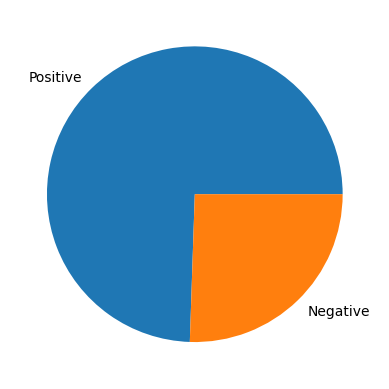

In [59]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handling imbalanced dataset ###

In [63]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\BLACKBOX\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [65]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9436, 1146) (9436,)


In [67]:
y_train_smote.value_counts()

label
1    4718
0    4718
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

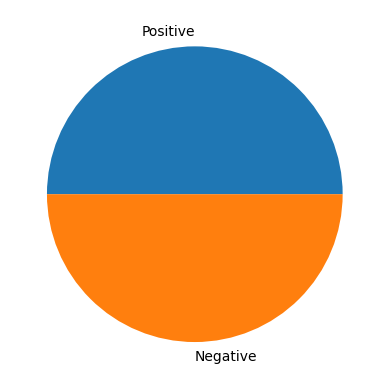

In [68]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels = ['Positive', 'Negative'])
plt.show

In [73]:
vectorized_x_train_smote

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.98141646, 0.98141646, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(9436, 1146), dtype=float32)

In [70]:
y_train_smote

0       1
1       0
2       1
3       0
4       0
       ..
9431    1
9432    1
9433    1
9434    1
9435    1
Name: label, Length: 9436, dtype: int64

In [74]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1146), dtype=float32)

In [76]:
y_test.value_counts()

label
0    1176
1     408
Name: count, dtype: int64

## Model Training and Evaluation ##

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [114]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred),3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tF1-score = {f1}\n\tPrecision = {pr}\n\tRecall = {rec}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred),3)
    print(f'Testing scores:\n\tAccuracy = {acc}\n\tF1-score = {f1}\n\tPrecision = {pr}\n\tRecall = {rec}')

### Logistic Regression ###

In [115]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [116]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [117]:
y_train_pred

array([1, 0, 1, ..., 1, 1, 1], shape=(9436,))

In [118]:
y_train_smote

0       1
1       0
2       1
3       0
4       0
       ..
9431    1
9432    1
9433    1
9434    1
9435    1
Name: label, Length: 9436, dtype: int64

In [119]:
training_scores(y_train_smote, y_train_pred)

Training Scores:
	Accuracy = 0.941
	F1-score = 0.943
	Precision = 0.918
	Recall = 0.969


In [120]:
y_test_pred = lr.predict(vectorized_x_test)

In [121]:
y_test_pred

array([0, 0, 0, ..., 1, 1, 0], shape=(1584,))

In [122]:
y_test

6200    0
4367    0
2768    0
4091    1
1433    0
       ..
302     1
6849    0
5040    1
3396    1
7055    0
Name: label, Length: 1584, dtype: int64

In [123]:
validation_scores(y_test, y_test_pred)

Testing scores:
	Accuracy = 0.886
	F1-score = 0.793
	Precision = 0.744
	Recall = 0.848


### Naive Bayes ###

In [125]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)
y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.908
	F1-score = 0.913
	Precision = 0.871
	Recall = 0.959
Testing scores:
	Accuracy = 0.874
	F1-score = 0.792
	Precision = 0.688
	Recall = 0.931


### Decision Tree ###

In [129]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)
y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	F1-score = 1.0
	Precision = 1.0
	Recall = 1.0
Testing scores:
	Accuracy = 0.84
	F1-score = 0.686
	Precision = 0.693
	Recall = 0.679


### Random Forest ###

In [131]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)
y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	F1-score = 1.0
	Precision = 1.0
	Recall = 1.0
Testing scores:
	Accuracy = 0.874
	F1-score = 0.744
	Precision = 0.78
	Recall = 0.711


### Support Vector Machine ###

In [140]:
svc = SVC()
svc.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svc.predict(vectorized_x_train_smote)
y_test_pred = svc.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)                    

Training Scores:
	Accuracy = 0.979
	F1-score = 0.98
	Precision = 0.964
	Recall = 0.997
Testing scores:
	Accuracy = 0.892
	F1-score = 0.797
	Precision = 0.772
	Recall = 0.824


In [142]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)